In [2]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Basic Dataset Information
print("Products Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())
print("\nCustomers Dataset Info:")
print(customers.info())

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2)

In [5]:
# Data Cleaning and merging
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [6]:
# Checking for missing values
print("\nMissing values in Products dataset:")
print(products.isnull().sum())
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())
     


Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


C:\Users\91848\AppData\Local\Temp\ipykernel_26032\940228845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")


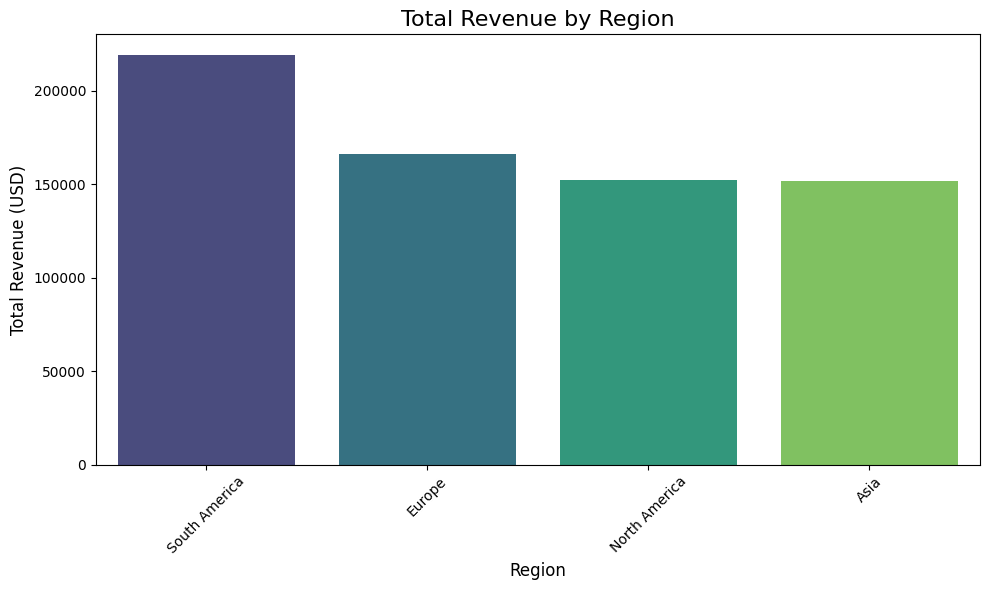

In [8]:
#Total Revenue by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False) # Changed 'data' to 'merged_data'
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title("Total Revenue by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\91848\AppData\Local\Temp\ipykernel_26032\2897509347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="magma")


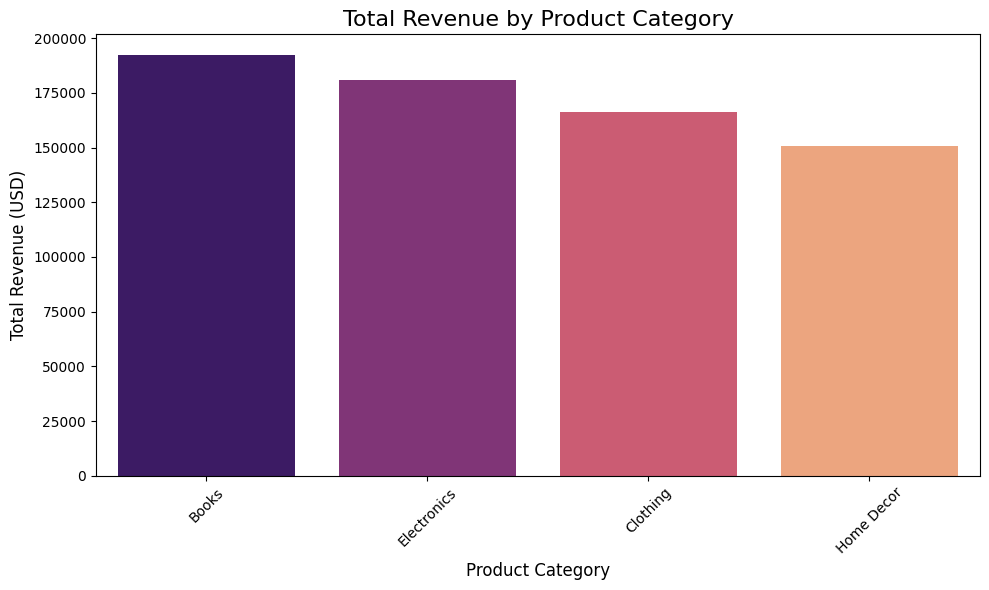

In [9]:
# Total Revenue by Product Category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False) # Changed 'data' to 'merged_data'
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="magma")
plt.title("Total Revenue by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

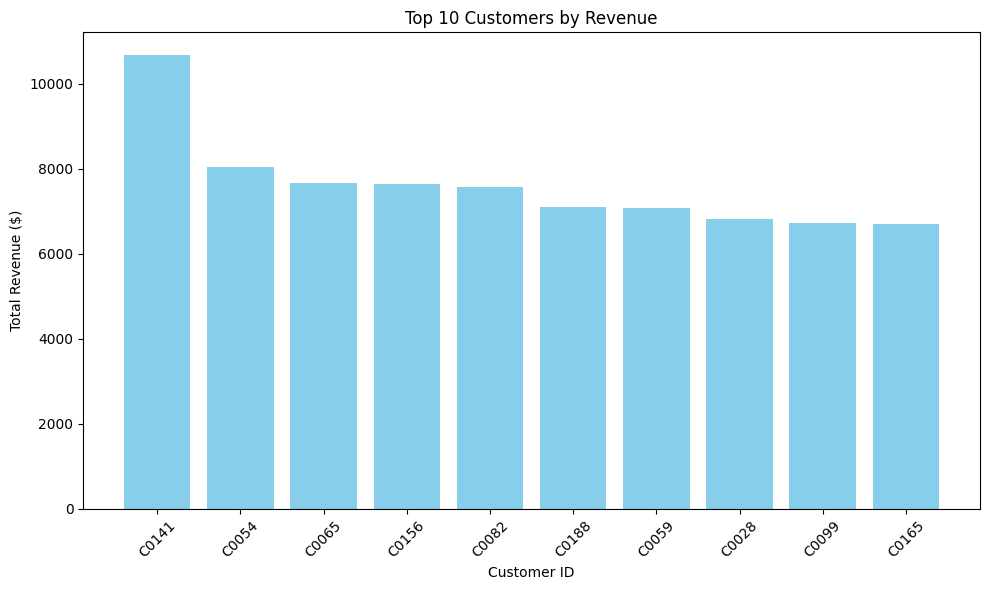

In [10]:
# Top Customers (Revenue Contribution)
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'], top_customers['TotalValue'], color='skyblue')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

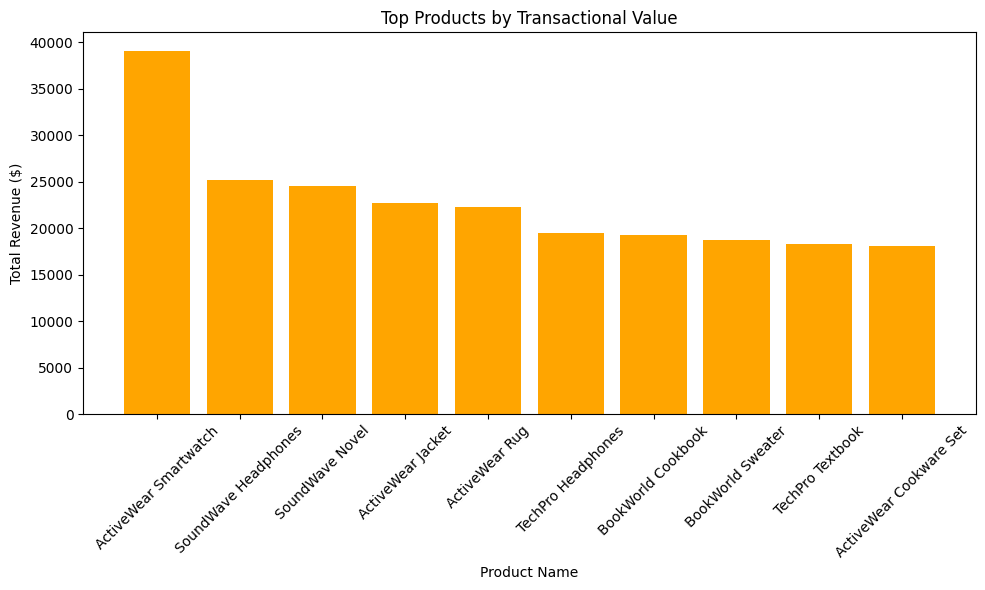

In [11]:
# Top Products by Transactional Value
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(top_products['ProductName'], top_products['TotalValue'], color='orange')
plt.title('Top Products by Transactional Value')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

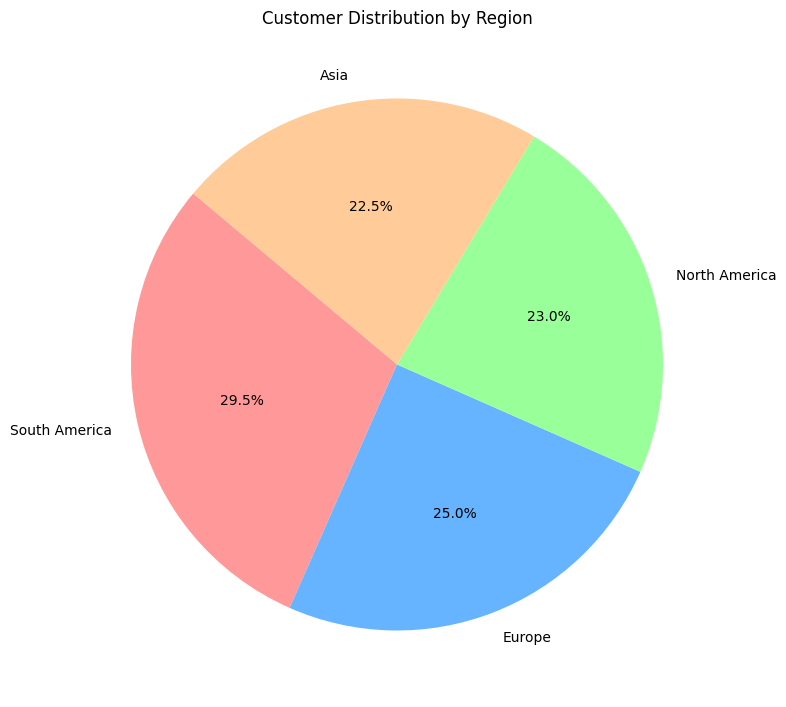

In [12]:
# Customer Distribution by Region
region_distribution = customers['Region'].value_counts().reset_index()
region_distribution.columns = ['Region', 'Number of Customers']
plt.figure(figsize=(8, 8))
plt.pie(region_distribution['Number of Customers'], labels=region_distribution['Region'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Distribution by Region')
plt.tight_layout()
plt.show()

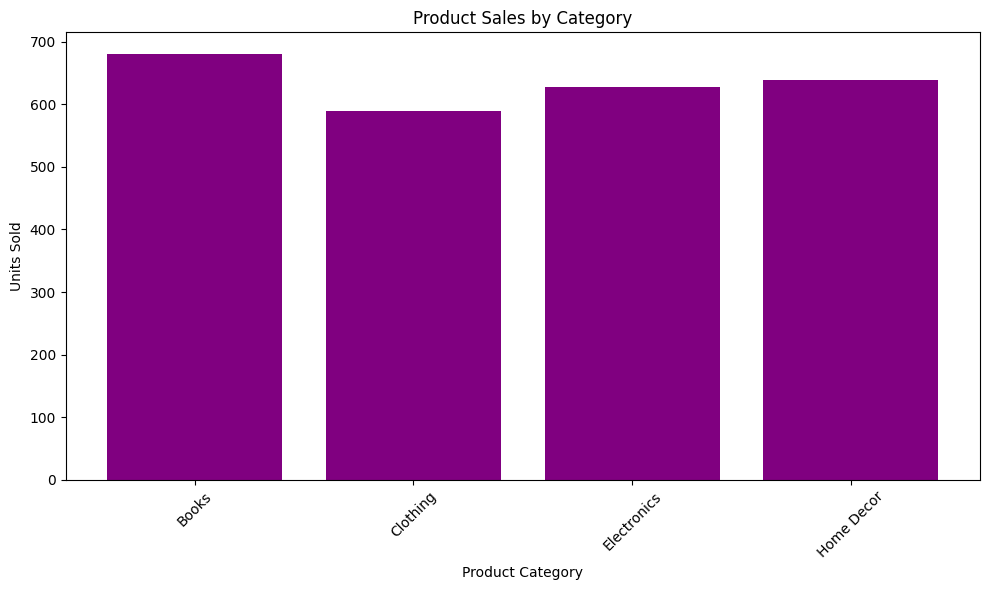

In [13]:
# Product Sales by Category
category_sales = merged_data.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['Quantity'], color='purple')
plt.title('Product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
     

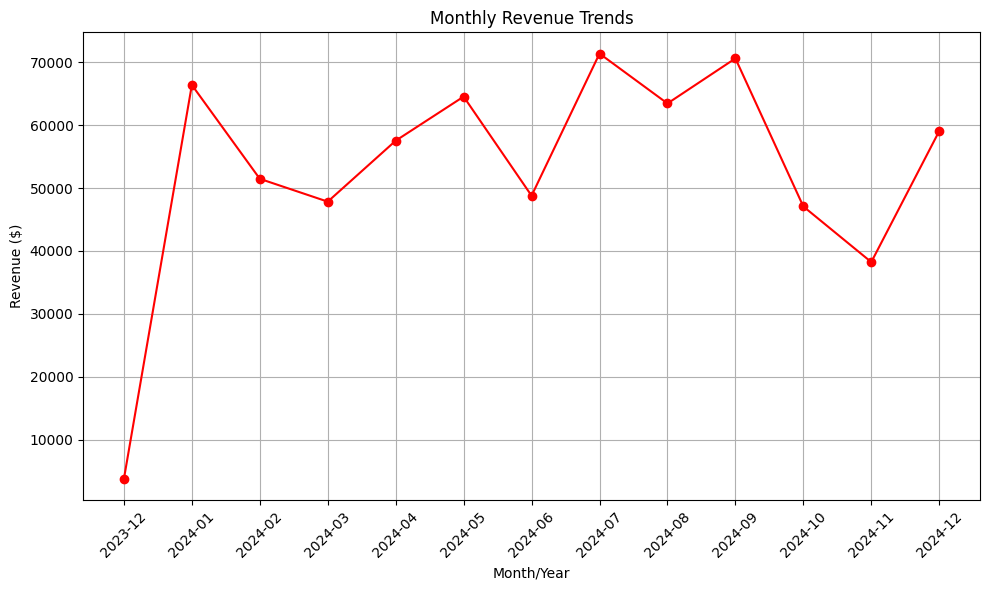

In [14]:
# Monthly Revenue Trends
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('MonthYear')['TotalValue'].sum().reset_index()
monthly_revenue['MonthYear'] = monthly_revenue['MonthYear'].astype(str)
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['MonthYear'], monthly_revenue['TotalValue'], marker='o', color='red')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month/Year')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

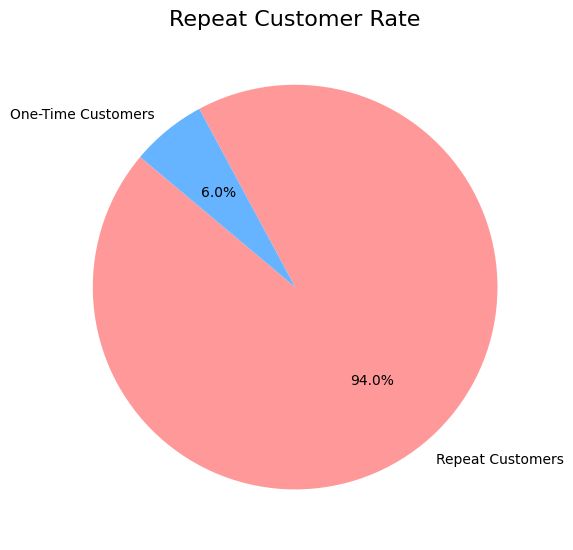

In [15]:
#repeat customer rate
repeat_customers = merged_data.groupby('CustomerID')['TransactionID'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].shape[0]
total_customers = merged_data['CustomerID'].nunique()
repeat_rate = (repeat_customers / total_customers) * 100

plt.figure(figsize=(6, 6))
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_rate, 100 - repeat_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Repeat Customer Rate", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
high_price_products = products[products["Price"] > products["Price"].quantile(0.75)]
high_price_revenue = merged_data[merged_data["ProductID"].isin(high_price_products["ProductID"])]
print("Products with high unit prices, like TechPro gadgets, contribute significantly to revenue:")
print(high_price_revenue.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False))

Products with high unit prices, like TechPro gadgets, contribute significantly to revenue:
ProductName
ActiveWear Smartwatch         25925.80
SoundWave Novel               24507.90
TechPro Headphones            19513.80
ActiveWear Rug                17946.91
TechPro Cookbook              17905.20
TechPro Smartwatch            13778.88
ComfortLiving Smartphone      13232.12
TechPro Textbook              12941.76
ActiveWear Textbook           12214.02
HomeSense Cookware Set        12078.18
BookWorld Cookbook            11238.49
ActiveWear Jeans              11161.54
BookWorld Sweater             10690.25
HomeSense Running Shoes       10405.66
TechPro T-Shirt               10303.44
TechPro Novel                 10286.29
BookWorld Biography            9576.05
ActiveWear Cookware Set        9545.13
ComfortLiving Mystery Book     8737.80
SoundWave T-Shirt              8672.04
SoundWave Cookbook             8403.00
SoundWave Smartwatch           6897.90
ActiveWear Headphones          5990.10
